# Generate fake data for "experiment"

## Imports

In [1]:
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker

## Generate and save data

We'll make some fake data here with some fake identifiers in the dataset. There will also be a recorded sprint time based on a fake regression equation. I use the men and women all time world records as a base for the sprint performance. 

In [2]:
def generate_participant(num: int = 0) -> dict:
    """Generates a participant for a fake wheelchair racing experiment"""
    fake = Faker("nl_NL")
    
    RECORD_MALE = 9.58  # base times on the all time world record
    RECORD_FEMALE = 10.49
    DOMAINS = ["hotmail.com", "outlook.com", "live.nl", "planet.nl"]

    sex = random.choice(["Male", "Female"])
    name = fake.first_name_male() if sex == "Male" else fake.first_name_female()
    address = f"{fake.street_address()}; Eindhoven"
    phone = fake.phone_number()
    surname = fake.last_name_nonbinary()
    email = f"{name}_{surname.replace(' ', '_')}@{random.choice(DOMAINS)}".lower()
    
    weight = random.gauss(75, 5) if sex == "Male" else random.gauss(65, 5)    
    base = RECORD_MALE if sex == "Male" else RECORD_FEMALE
    sprint_time_T1 = base * 3 - weight * 0.1 + random.gauss(6, 1.5)
    sprint_time_T2 = sprint_time_T1 - weight * 0.05  - random.gauss(1, 0.5)
    
    return {"ID": f"PP{num:02}",
            "name": name,
            "email": email,
            "address": address,
            "phone": phone,
            "sex": sex,
            "weight_kg": round(weight, 1),
            "pre": round(sprint_time_T1, 2),
            "post": round(sprint_time_T2, 2)}

In [3]:
participants = pd.DataFrame([generate_participant(i) for i in range(1, 21)])
participants.head()

ID     name                               email  \
0  PP01   Olivia  olivia_van_de_eerenbeemt@planet.nl   
1  PP02    Tycho        tycho_hagendoorn@outlook,com   
2  PP03    Elise          elise_spanhaak@hotmail.com   
3  PP04     Dion            dion_rouwhorst@planet.nl   
4  PP05  Michael    michael_van_maasgouw@outlook,com   

                        address          phone     sex  weight_kg    pre  \
0        Elifdreef 5\nEindhoven  (0812) 209706  Female       63.3  29.44   
1     Mauritspad 122\nEindhoven    074 7917547    Male       76.0  29.91   
2         Lunalaan 7\nEindhoven    0101-564226  Female       62.1  29.64   
3  Dylanoboulevard 5\nEindhoven    0424-176465    Male       68.8  26.05   
4         Mayalaan 2\nEindhoven  (038) 7176211    Male       79.3  27.82   

    post  
0  25.26  
1  24.89  
2  26.36  
3  22.12  
4  22.30

We'll save this data to an Excel for the assignment and we'll generate three new participants for a later assignment.

In [4]:
participants.to_excel("wheelchair_sprints0/data.xlsx", index=False)

for i in range(21, 24):  
    pp = generate_participant(i)
    (pd.DataFrame([pp])
       .drop("ID", axis=1)
       .to_excel(f"new_data/{pp['ID']}.xlsx", 
                 index=False))

A true tidy format has the sprint measurements in a long format but that'll be a little bit too much for the workshop. I'll use it for Seaborn and still save it for demonstration purposes though.

In [5]:
long = participants.melt(id_vars=participants.columns[:-2], 
                         value_vars=["pre", "post"],
                         var_name="time", 
                         value_name="sprint_time")
long.to_csv("wheelchair_sprints0/data_long.csv",
              index=False)
long.head()

ID     name                               email  \
0  PP01   Olivia  olivia_van_de_eerenbeemt@planet.nl   
1  PP02    Tycho        tycho_hagendoorn@outlook,com   
2  PP03    Elise          elise_spanhaak@hotmail.com   
3  PP04     Dion            dion_rouwhorst@planet.nl   
4  PP05  Michael    michael_van_maasgouw@outlook,com   

                        address          phone     sex  weight_kg time  \
0        Elifdreef 5\nEindhoven  (0812) 209706  Female       63.3  pre   
1     Mauritspad 122\nEindhoven    074 7917547    Male       76.0  pre   
2         Lunalaan 7\nEindhoven    0101-564226  Female       62.1  pre   
3  Dylanoboulevard 5\nEindhoven    0424-176465    Male       68.8  pre   
4         Mayalaan 2\nEindhoven  (038) 7176211    Male       79.3  pre   

   sprint_time  
0        29.44  
1        29.91  
2        29.64  
3        26.05  
4        27.82

## Plots

In [6]:
plt.style.use(["science", "scatter"])
plt.rcParams['figure.dpi'] = 600

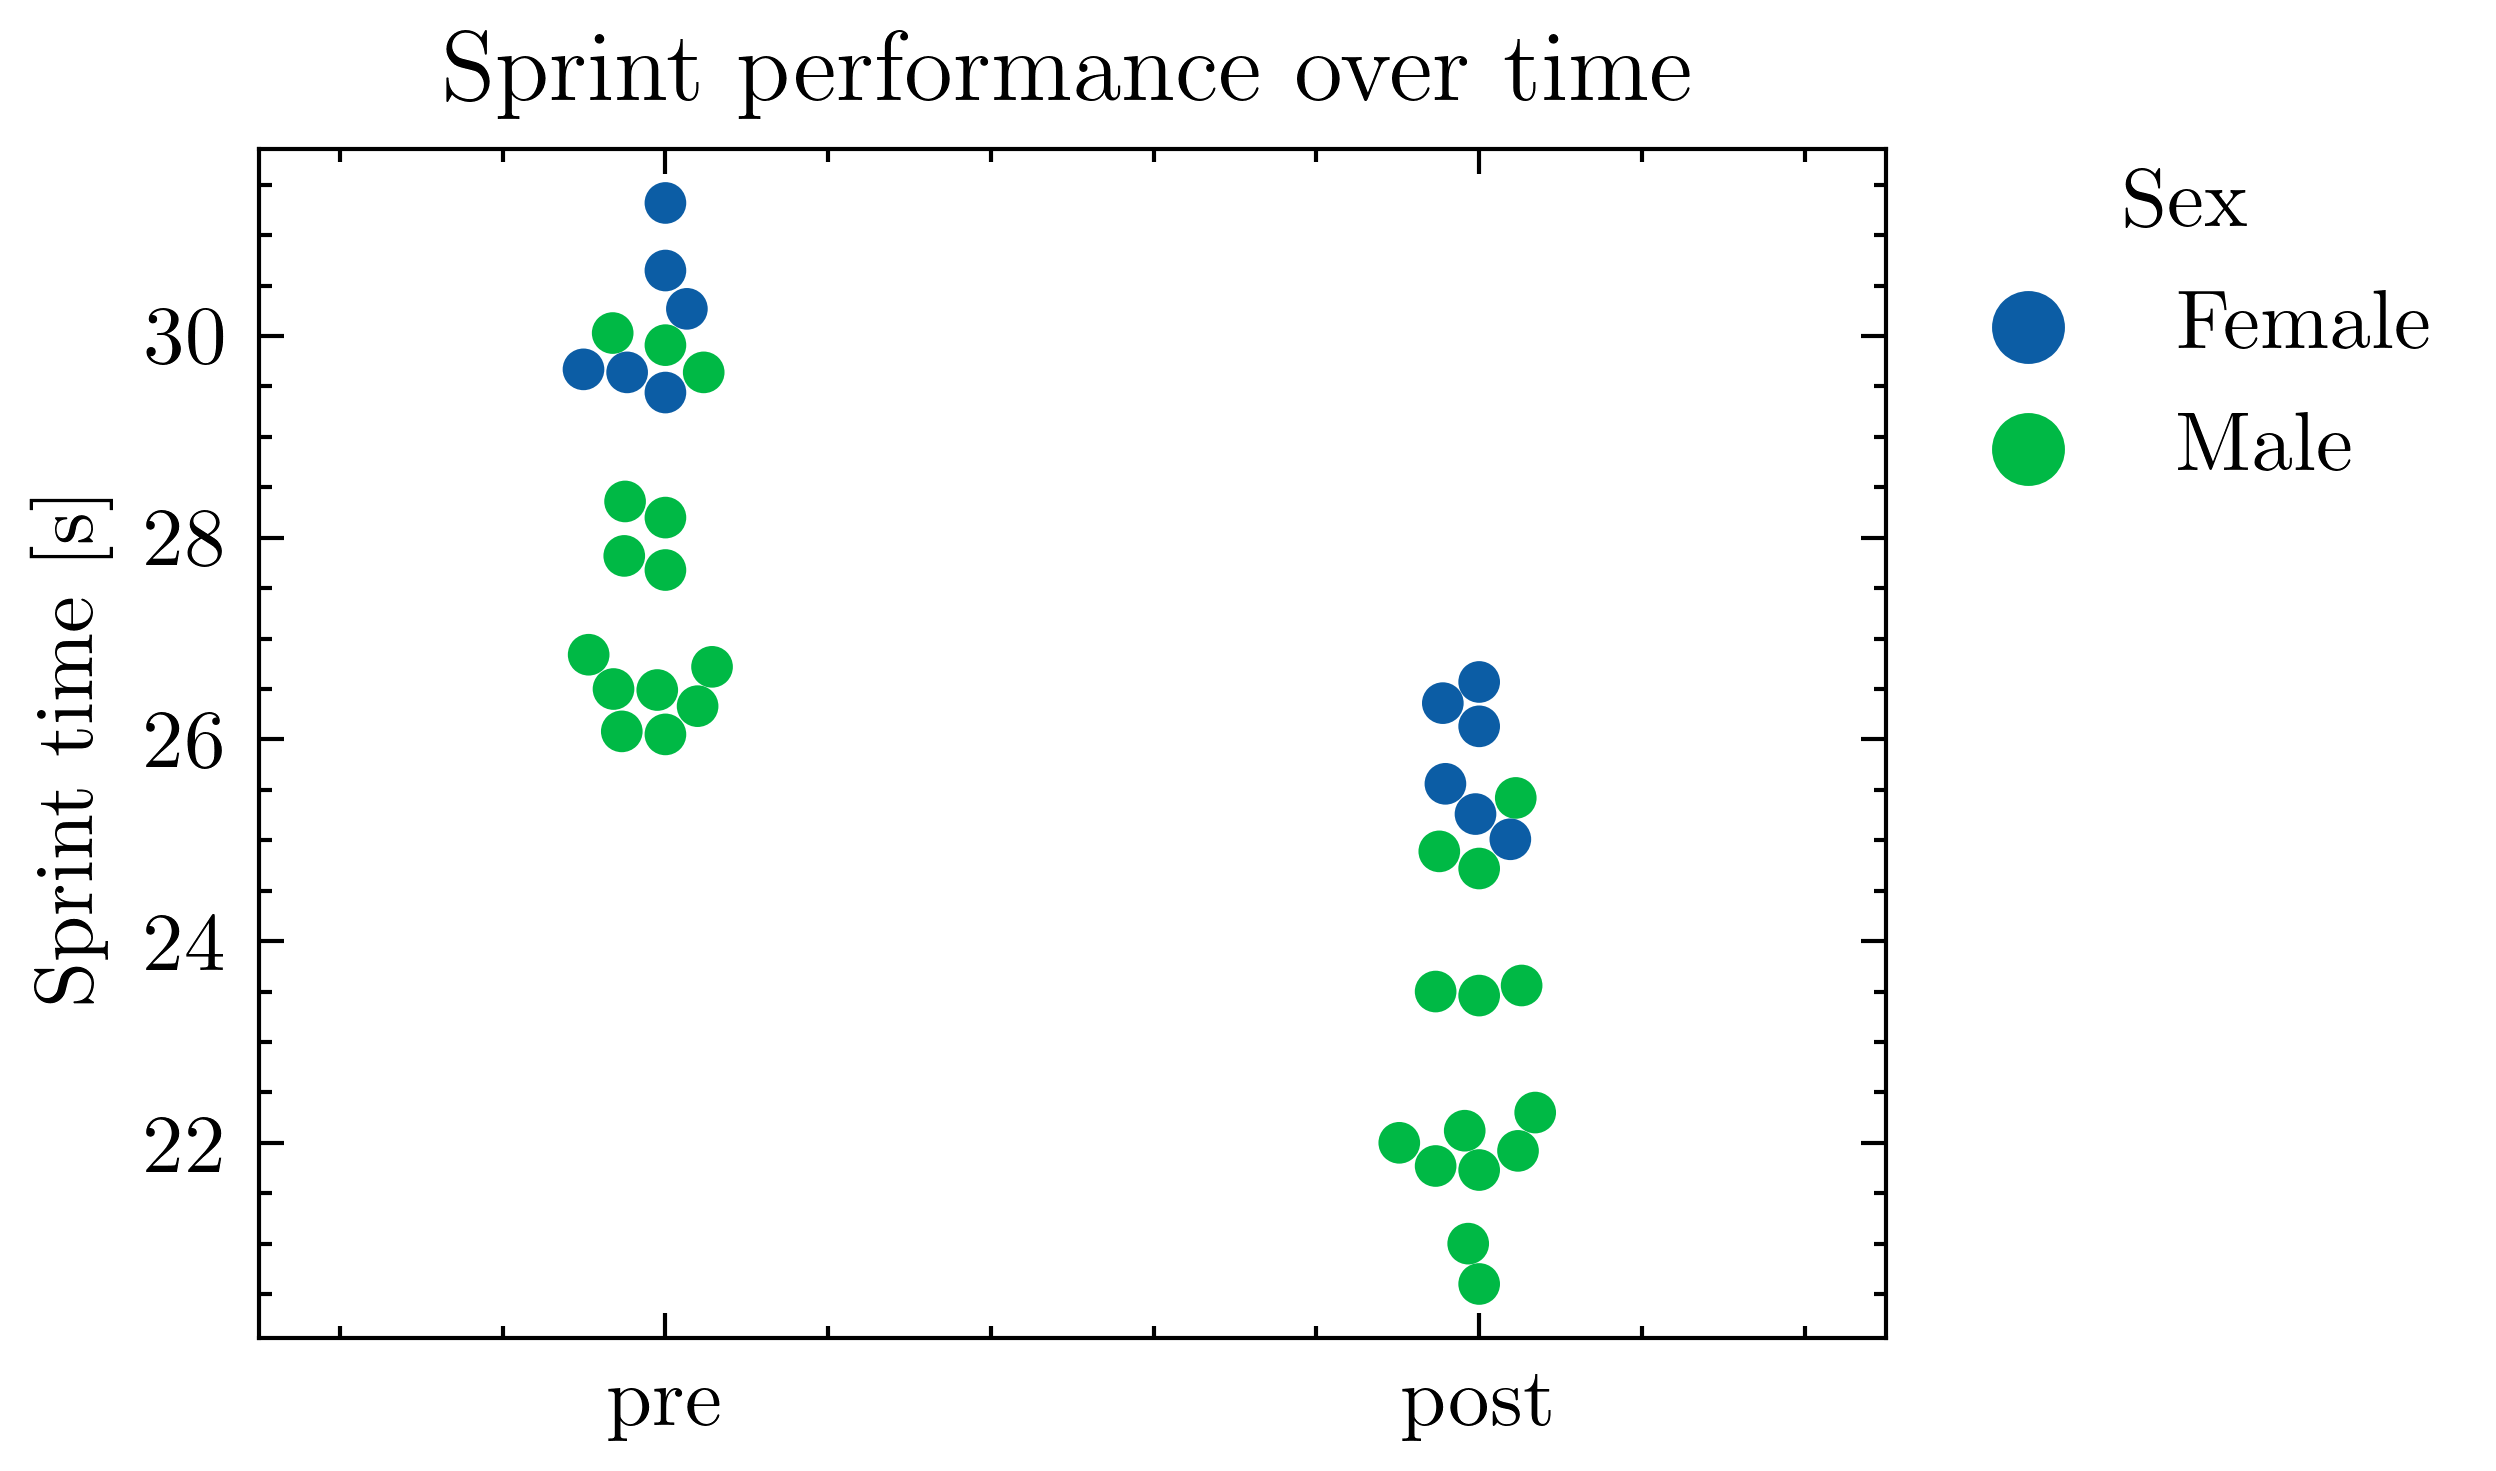

In [7]:
g = sns.swarmplot(x="time", y="sprint_time", hue="sex", data=long)
g.set_xlabel("")
g.set_ylabel("Sprint time [s]")
g.set_title("Sprint performance over time")

legend = g.legend(loc="upper left")
legend.set_bbox_to_anchor([0.99, 1.05])
legend.set_title("Sex")

plt.savefig("wheelchair_sprints0/figure1.png", facecolor="white", dpi=600)

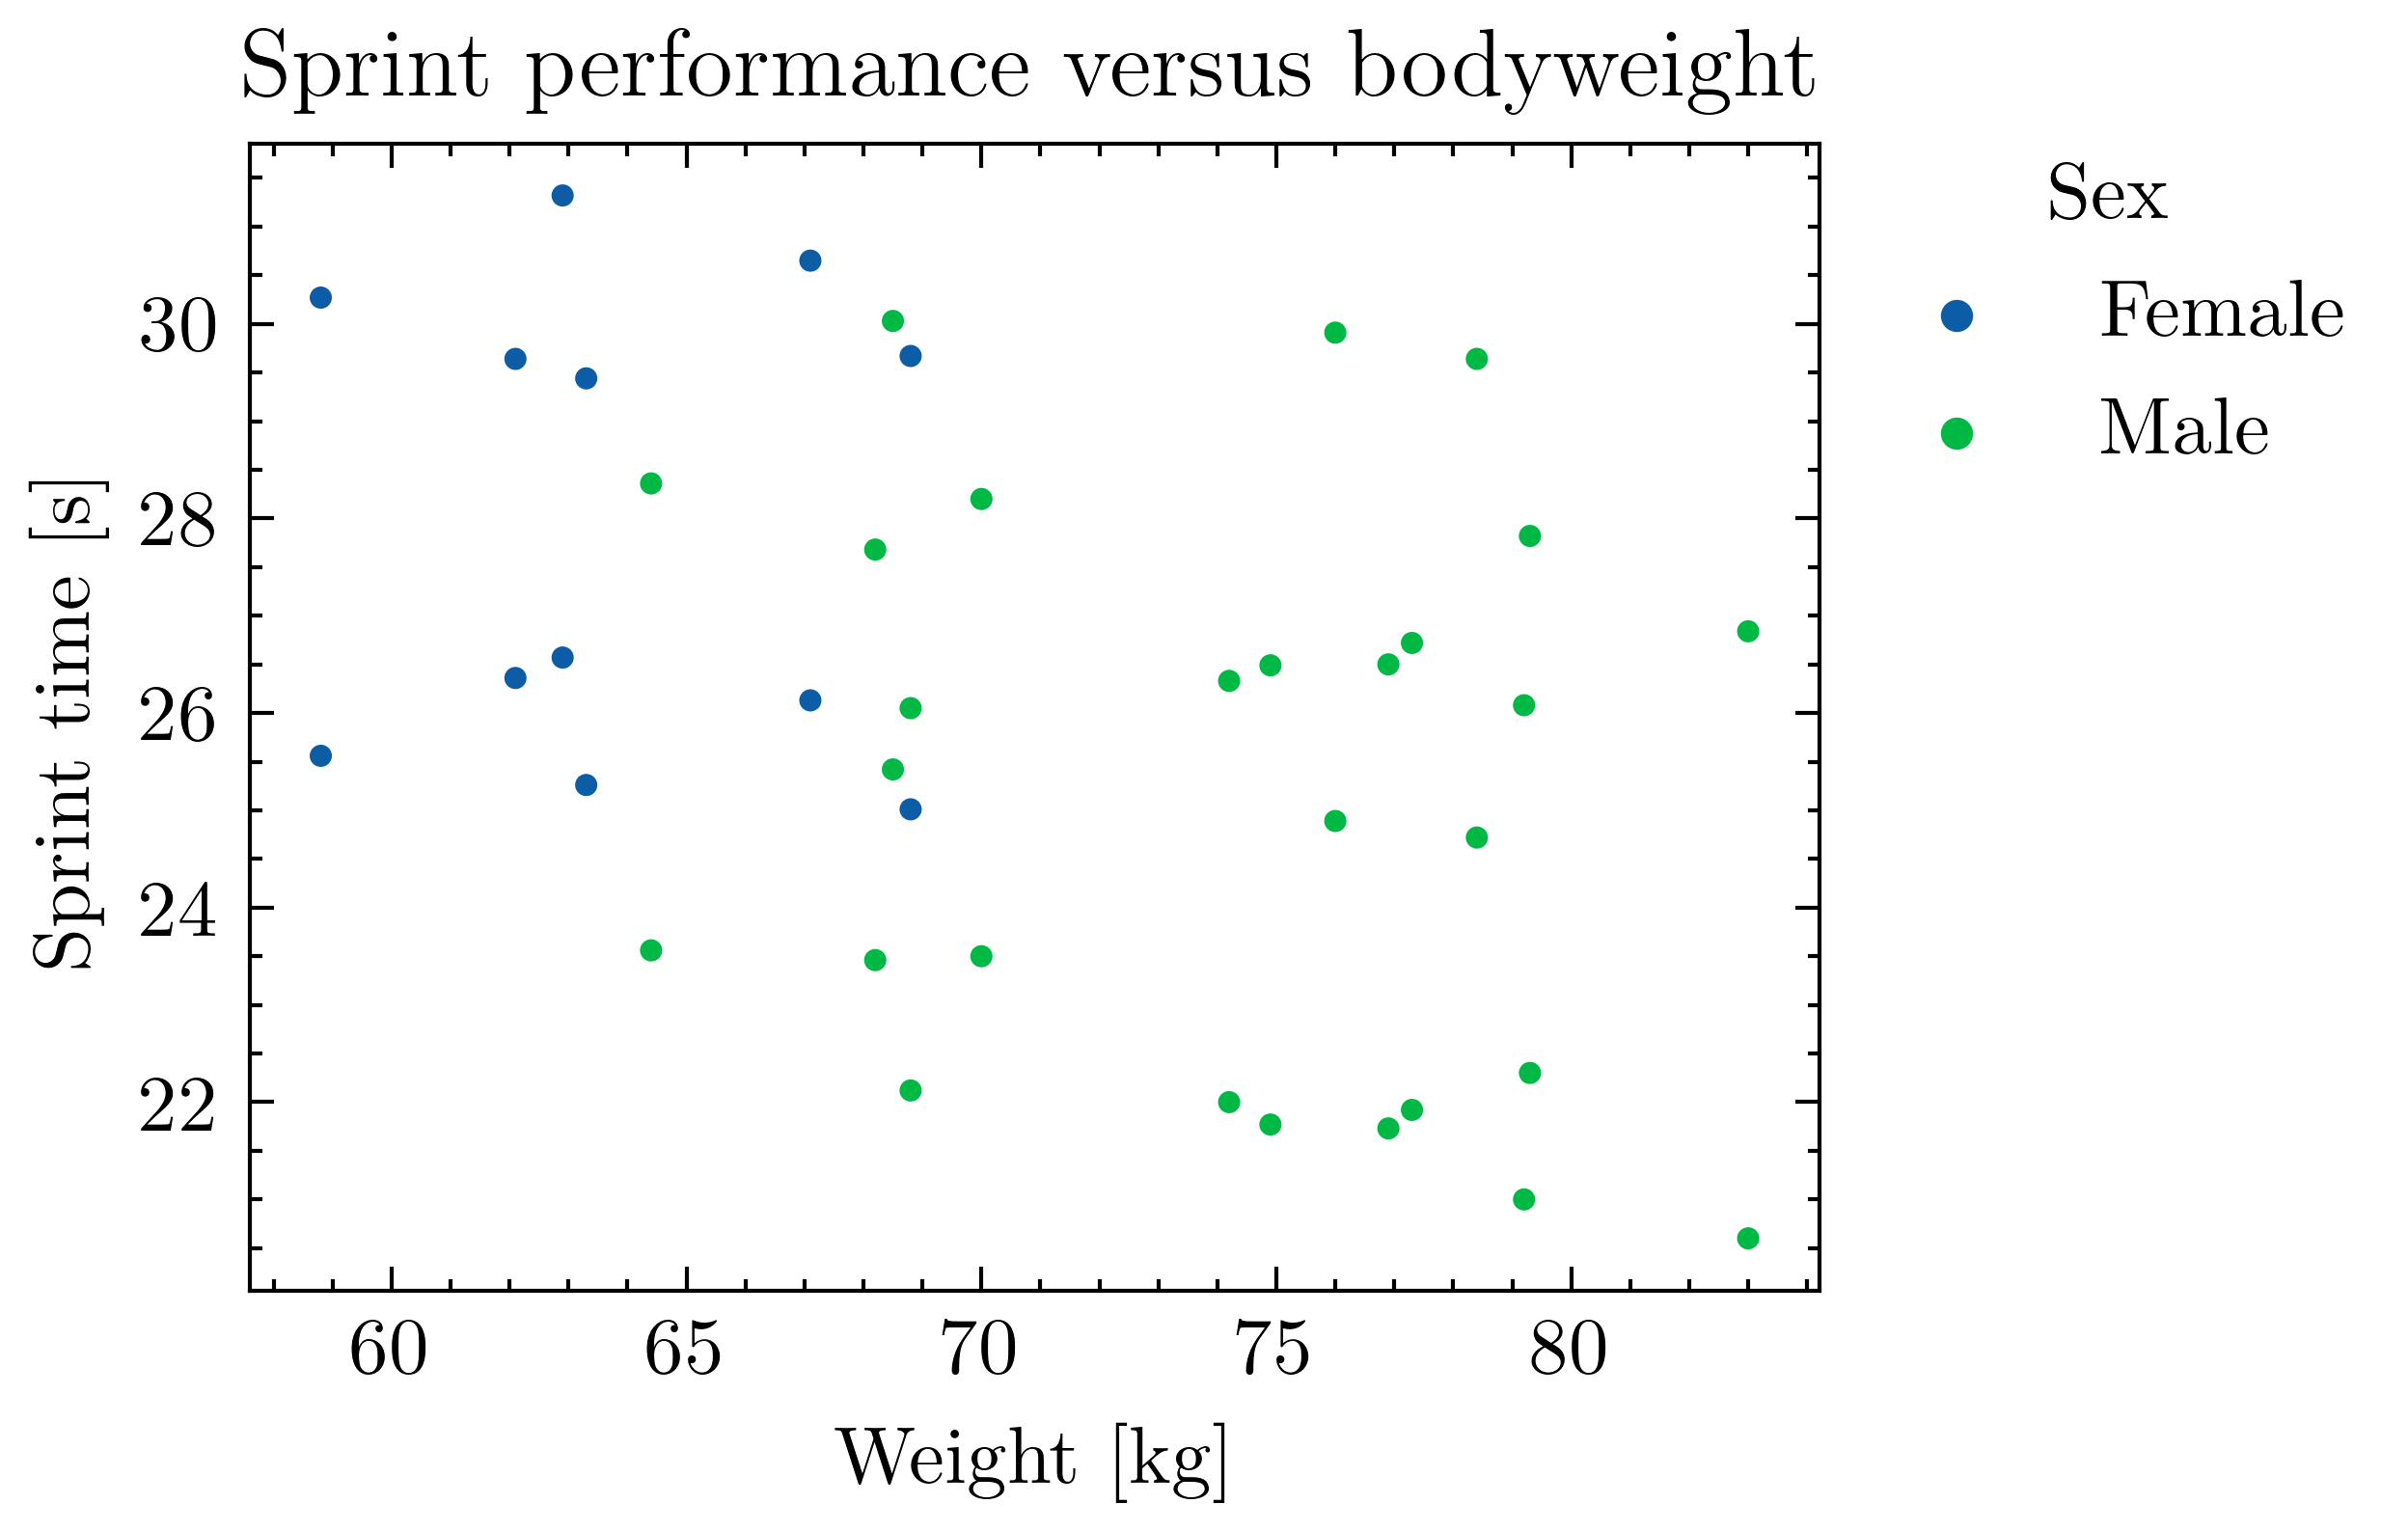

In [8]:
g = sns.scatterplot(x="weight_kg", y="sprint_time", hue="sex", data=long)
g.set_xlabel("Weight [kg]")
g.set_ylabel("Sprint time [s]")
g.set_title("Sprint performance versus bodyweight")

legend = g.legend(loc="upper left")
legend.set_bbox_to_anchor([0.99, 1.05])
legend.set_title("Sex")

plt.savefig("wheelchair_sprints0/figure2.png", facecolor="white", dpi=600)